In [42]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Convert to a DataFrame and render.
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTnDvWy-tH9hL8Gh6BoVTve_g1ueI_leMnmG8idP9fJ31AF99SmZhEmeirRjGsSWlK0nvsxtCEn6ZE6/pub?gid=523310976&single=true&output=csv')
data['zip'] = '0' + data['zip'].astype(str)

,zip,Driving_1_TE,Transit_1_TE,Difference_Driving_Transit_1_TE,Walking_1_TE,Driving_2_TE,Transit_2_TE,Difference_Driving_Transit_2_TE,Walking_2_TE,Driving_1_MC,...,Difference_Driving_Transit_2_HD,Walking_2_HD,Driving_1_DT,Transit_1_DT,Difference_Driving_Transit_1_DT,Walking_1_DT,Driving_2_DT,Transit_2_DT,Difference_Driving_Transit_2_DT,Walking_2_DT
0,02860,13.0,41,28.0,114,15.0,39,24.0,114,11.0,...,12.0,91,11.5,29,17.5,75,14.0,28,14.0,75
1,02903,6.5,12,5.5,35,6.0,12,6.0,35,6.0,...,3.0,12,5.0,12,7.0,13,5.0,16,11.0,13
2,02904,10.0,46,36.0,122,11.0,42,31.0,122,8.5,...,26.0,99,10.0,35,25.0,83,11.0,34,23.0,83
3,02905,3.0,5,2.0,12,3.0,5,2.0,12,9.5,...,4.0,42,10.5,20,9.5,57,11.0,20,9.0,57
4,02906,12.0,47,35.0,79,12.0,44,32.0,79,13.0,...,19.0,57,13.0,21,8.0,48,13.0,19,6.0,48
5,02907,11.0,39,28.0,47,11.0,53,42.0,47,13.0,...,26.0,61,15.0,25,10.0,68,14.0,30,16.0,68
6,02908,12.5,42,29.5,82,12.5,39,26.5,82,10.0,...,22.5,55,11.5,27,15.5,39,11.5,24,12.5,39
7,02909,11.5,49,37.5,83,12.0,56,44.0,83,10.0,...,24.5,63,15.0,21,6.0,51,15.0,19,4.0,51
8,02910,9.0,40,31.0,60,8.0,45,37.0,60,10.0,...,19.5,74,11.5,23,11.5,76,12.5,22,9.5,76
9,02911,19.0,44,25.0,125,19.0,49,30.0,125,17.0,...,13.0,98,18.0,28,10.0,82,18.0,24,6.0,82


In [45]:
zipcodes = gpd.read_file('shapefiles/Zip Codes/geo_export_7b90692b-83fc-4198-a66c-777f7ea4963d.shp')

In [46]:
gdf = zipcodes.merge(data,on='zip')

In [48]:
file_dict = [
    {'Location': 'Traffic Engineering', 'filename': 'traffic_eng', 'suffix': 'TE','data': gdf[['zip','Driving_1_TE','Transit_1_TE','Difference_Driving_Transit_1_TE','Walking_1_TE','Driving_2_TE','Transit_2_TE','Difference_Driving_Transit_2_TE','Walking_2_TE','geometry']]}, 
    {'Location': 'Municipal Court', 'filename':'muni_court', 'suffix':'MC','data': gdf[['zip','Driving_1_MC','Transit_1_MC','Difference_Driving_Transit_1_MC','Walking_1_MC','Driving_2_MC','Transit_2_MC','Difference_Driving_Transit_2_MC','Walking_2_MC','geometry']]},
    {'Location':'Hospital District', 'filename': 'hospital_dist', 'suffix':'HD','data':gdf[['zip', 'Driving_1_HD','Transit_1_HD','Difference_Driving_Transit_1_HD','Walking_1_HD','Driving_2_HD','Transit_2_HD','Difference_Driving_Transit_2_HD','Walking_2_HD','geometry']]}
]

for dict in file_dict:
    data_gdf = dict['data']
    location = dict['Location']
    filename = dict['filename']
    suffix = dict['suffix']

    fig,ax = plt.subplots(1,figsize=(10,6))
    data_gdf.plot(column=f'Driving_1_{suffix}',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
    ax.axis('off')
    ax.set_title(f'Travel Time (Min) to {location} by Car, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
    fig.savefig(f'Visualizations/{filename}_driving_1.png',bbox_inches = 'tight')
    plt.close()

    fig,ax = plt.subplots(1,figsize=(10,6))
    data_gdf.plot(column=f'Transit_1_{suffix}',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
    ax.axis('off')
    ax.set_title(f'Travel Time (Min) to {location} by Transit, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
    fig.savefig(f'Visualizations/{filename}_transit_1.png',bbox_inches = 'tight')
    plt.close()

    fig,ax = plt.subplots(1,figsize=(10,6))
    data_gdf.plot(column=f'Driving_2_{suffix}',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
    ax.axis('off')
    ax.set_title(f'Travel Time (Min) to {location}) by Car, 6PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
    fig.savefig(f'Visualizations/{filename}_driving_2.png',bbox_inches = 'tight')
    plt.close()

    fig,ax = plt.subplots(1,figsize=(10,6))
    data_gdf.plot(column=f'Transit_2_{suffix}',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
    ax.axis('off')
    ax.set_title(f'Travel Time (Min) to {location} by Transit, 6PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
    fig.savefig(f'Visualizations/{filename}_transit_2.png',bbox_inches = 'tight')
    plt.close()

    fig,ax = plt.subplots(1,figsize=(10,6))
    data_gdf.plot(column=f'Difference_Driving_Transit_1_{suffix}',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
    ax.axis('off')
    ax.set_title(f'Difference in Travel Times (Transit versus Car) to {location}, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
    fig.savefig(f'Visualizations/{filename}_time_difference1.png',bbox_inches = 'tight')
    plt.close()

    fig,ax = plt.subplots(1,figsize=(10,6))
    data_gdf.plot(column=f'Difference_Driving_Transit_2_{suffix}',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
    ax.axis('off')
    ax.set_title(f'Difference in Travel Times (Transit versus Car) to {location}, 6PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
    fig.savefig(f'Visualizations/{filename}_time_difference2.png',bbox_inches = 'tight')
    plt.close()

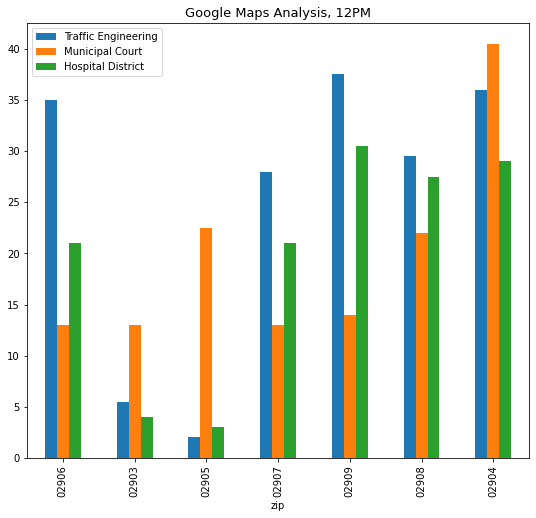

In [58]:
fig,ax = plt.subplots(1,figsize=(10,6))
gdf.plot(x="zip", y=["Difference_Driving_Transit_1_TE", "Difference_Driving_Transit_1_MC",'Difference_Driving_Transit_1_HD'], kind="bar",figsize=(9,8),ax=ax)
ax.legend(labels=['Traffic Engineering','Municipal Court', 'Hospital District'])
ax.set_title(f'Google Maps Analysis, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})

# plt.show()
fig.savefig('Visualizations/travel_differences_1.png',bbox_inches = 'tight')
# plt.close()